# What is a Jupyter notebook?
***
A Jupyter notebook is a document that allows you to have executable code and text in the same webpage. With Jupyter notebooks you do not have to download anything on your computer to do the programming exercises. Everything is provided for you online. You will be completing the exercise as you scroll down the webpage without having to jump between different files.

# How do I run a cell?
***
To run a cell, click on the cell and press **Shift & Enter**. You could also run the cell (or cells) by going to Cell and selecting one of the options:

![Cell](img/Cell.png)

# What is a kernel?
***
You could think of the kernel as the core of the Jupyter notebook's operating system. Sometimes if the notebook blocks or if you want to clear all the variables and start all over again, rather than quitting the notebook and opening it again, you could restart the kernel and clear the output if you accidentally end up in some sort of infinite loop:

![Kernel](img/Kernel.png)


# Why do I get different results every time I run the same cell?
***
When you run a cell that updates some variable (e.g x: x+1), you will get different results for x as it keeps incrementing. Make sure you are not modifying your existing variables.

# How do I save my progress?
***
Click on File ==> Save and Checkpoint

![File](img/File.png)

# What should I do if my jupyter notebook froze?
***
Just restart the kernel by clicking on Kernel ==> Restart.

# Python Basics with numpy 

- Learn how to use numpy.
- Implement some basic core deep learning functions such as the softmax, sigmoid, dsigmoid, etc...
- Learn how to handle data by normalizing inputs and reshaping images.

## 1 - Plot figure with numpy 

Numpy is the main package for scientific computing in Python. It is maintained by a large [community](www.numpy.org). In this exercise you will learn several key numpy functions such as np.exp, np.log, and np.reshape. 


Before using np.exp(), you will use math.exp() to implement the sigmoid function. You will then see why np.exp() is preferable to math.exp().

**Exercise**: Build a function that returns the sigmoid of a real number x. Use math.exp(x) for the exponential function.

**Reminder**:
$sigmoid(x) = \frac{1}{1+e^{-x}}$ is sometimes also known as the logistic function. It is a non-linear function used not only in Machine Learning (Logistic Regression), but also in Deep Learning.



0.9933071490757153
[  2.71828183   7.3890561   20.08553692]
[4 5 6]
[ 0.73105858  0.88079708  0.95257413]


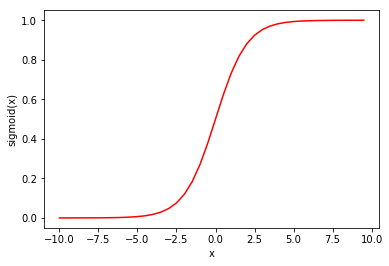

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt

x = 5
y = 1 / (1 + math.exp(-x))
print(y)

# Actually, we rarely use the "math" library in deep learning because the inputs of the functions are real numbers. 
# In deep learning we mostly use matrices and vectors. This is why numpy is more useful.

x = np.array([1, 2, 3])
y = np.exp(x) # result is (exp(1), exp(2), exp(3))
print(y)

# So does
y = x + 3
print(y)

y = 1 / (1 + np.exp(-x))
print(y)

x = np.arange(-10, 10, 0.5)
y = 1 / (1 + np.exp(-x))
plt.plot(x, y, 'r')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.show()

## 2 - Two often used function in deep learning or matrix computation

### - [np.shape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html) 
> X.shape is used to get the shape (dimension) of a matrix/vector X. 

### - [np.reshape()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html). 
> X.reshape(...) is used to reshape X into some other dimension. 

For example, in computer science, an image is represented by a 3D array of shape  (length,height,depth=3)(length,height,depth=3) . However, when you read an image as the input of an algorithm you convert it to a vector of shape  (length∗height∗3,1)(length∗height∗3,1) . In other words, you "unroll", or reshape, the 3D array into a 1D vector.

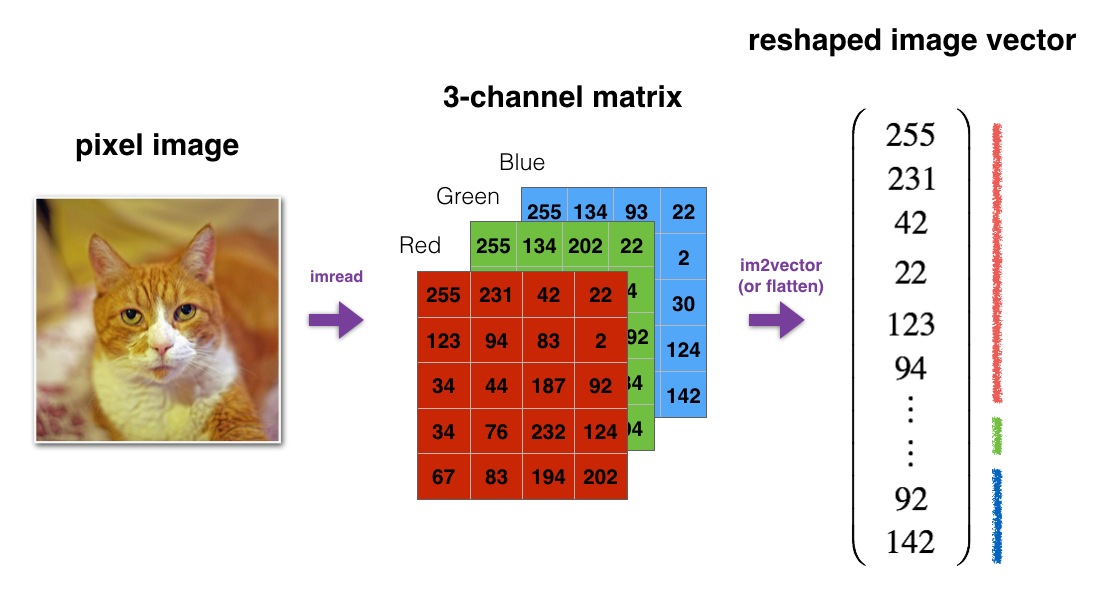

 

In [2]:
# This is a 3x3x2 matrix
x = np.array([[[ 0.67826139,  0.29380381],
        [ 0.90714982,  0.52835647],
        [ 0.4215251 ,  0.45017551]],

       [[ 0.92814219,  0.96677647],
        [ 0.85304703,  0.52351845],
        [ 0.19981397,  0.27417313]],

       [[ 0.60659855,  0.00533165],
        [ 0.10820313,  0.49978937],
        [ 0.34144279,  0.94630077]]])
print(x.shape)

reshaped_x = x.reshape((x.shape[0] * x.shape[1] * x.shape[2], 1))
print(reshaped_x)

# Also we can use -1 to calculate the specific dimension automatically.

reshaped_x = x.reshape((-1, 1))
print(reshaped_x)

(3, 3, 2)
[[ 0.67826139]
 [ 0.29380381]
 [ 0.90714982]
 [ 0.52835647]
 [ 0.4215251 ]
 [ 0.45017551]
 [ 0.92814219]
 [ 0.96677647]
 [ 0.85304703]
 [ 0.52351845]
 [ 0.19981397]
 [ 0.27417313]
 [ 0.60659855]
 [ 0.00533165]
 [ 0.10820313]
 [ 0.49978937]
 [ 0.34144279]
 [ 0.94630077]]
[[ 0.67826139]
 [ 0.29380381]
 [ 0.90714982]
 [ 0.52835647]
 [ 0.4215251 ]
 [ 0.45017551]
 [ 0.92814219]
 [ 0.96677647]
 [ 0.85304703]
 [ 0.52351845]
 [ 0.19981397]
 [ 0.27417313]
 [ 0.60659855]
 [ 0.00533165]
 [ 0.10820313]
 [ 0.49978937]
 [ 0.34144279]
 [ 0.94630077]]


## 3 - Normalizing rows

** Another common technique we use in Machine Learning is to normalize our data. Here, by normalization we mean changing x to $ \frac{x}{\| x\|} $ (dividing each row vector of x by its norm). **

> For example, if $$x = 
\begin{bmatrix}
    0 & 3 & 4 \\
    2 & 6 & 4 \\
\end{bmatrix}\tag{1}$$ then $$\| x\| = np.linalg.norm(x, axis = 1, keepdims = True) = \begin{bmatrix}
    5 \\
    \sqrt{56} \\
\end{bmatrix}\tag{2} $$and        $$ x\_normalized = \frac{x}{\| x\|} = \begin{bmatrix}
    0 & \frac{3}{5} & \frac{4}{5} \\
    \frac{2}{\sqrt{56}} & \frac{6}{\sqrt{56}} & \frac{4}{\sqrt{56}} \\
\end{bmatrix}\tag{3}$$ Note that you can divide matrices of different sizes and it works fine: this is called broadcasting.



In [3]:
x = np.array([[0, 3, 4], [1, 6, 4]])

print(np.__version__)
x_norm = np.linalg.norm(x, axis=1, keepdims=True)
x_norm.reshape((-1, 1))
print(x_norm.shape)
x = x / x_norm

print(x)

1.13.1
(2, 1)
[[ 0.          0.6         0.8       ]
 [ 0.13736056  0.82416338  0.54944226]]


## 4 - Broadcasting and the softmax function

> A very important concept to understand in numpy is "broadcasting". It is very useful for performing mathematical operations between arrays of different shapes. For the full details on broadcasting, you can read the official [broadcasting documentation](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html).

> **Exercise**: Implement a softmax function using numpy. You can think of softmax as a normalizing function used when your algorithm needs to classify two or more classes.


**Instructions**:

- $ \text{for } x \in \mathbb{R}^{1\times n} \text{,     } softmax(x) = softmax(\begin{bmatrix}
    x_1  &&
    x_2 &&
    ...  &&
    x_n  
\end{bmatrix}) = \begin{bmatrix}
     \frac{e^{x_1}}{\sum_{j}e^{x_j}}  &&
    \frac{e^{x_2}}{\sum_{j}e^{x_j}}  &&
    ...  &&
    \frac{e^{x_n}}{\sum_{j}e^{x_j}} 
\end{bmatrix} $ 

- $\text{for a matrix } x \in \mathbb{R}^{m \times n} \text{,  $x_{ij}$ maps to the element in the $i^{th}$ row and $j^{th}$ column of $x$, thus we have: }$  $$softmax(x) = softmax\begin{bmatrix}
    x_{11} & x_{12} & x_{13} & \dots  & x_{1n} \\
    x_{21} & x_{22} & x_{23} & \dots  & x_{2n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{m1} & x_{m2} & x_{m3} & \dots  & x_{mn}
\end{bmatrix} = \begin{bmatrix}
    \frac{e^{x_{11}}}{\sum_{j}e^{x_{1j}}} & \frac{e^{x_{12}}}{\sum_{j}e^{x_{1j}}} & \frac{e^{x_{13}}}{\sum_{j}e^{x_{1j}}} & \dots  & \frac{e^{x_{1n}}}{\sum_{j}e^{x_{1j}}} \\
    \frac{e^{x_{21}}}{\sum_{j}e^{x_{2j}}} & \frac{e^{x_{22}}}{\sum_{j}e^{x_{2j}}} & \frac{e^{x_{23}}}{\sum_{j}e^{x_{2j}}} & \dots  & \frac{e^{x_{2n}}}{\sum_{j}e^{x_{2j}}} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    \frac{e^{x_{m1}}}{\sum_{j}e^{x_{mj}}} & \frac{e^{x_{m2}}}{\sum_{j}e^{x_{mj}}} & \frac{e^{x_{m3}}}{\sum_{j}e^{x_{mj}}} & \dots  & \frac{e^{x_{mn}}}{\sum_{j}e^{x_{mj}}}
\end{bmatrix} = \begin{pmatrix}
    softmax\text{(first row of x)}  \\
    softmax\text{(second row of x)} \\
    ...  \\
    softmax\text{(last row of x)} \\
\end{pmatrix} $$

In [5]:
x = np.array([
    [9, 2, 5, 0, 0],
    [7, 5, 0, 0 ,0]])

x_exp = np.exp(x)
x_sum = np.sum(x_exp, axis=1, keepdims=True)
softmax = x_exp / x_sum

print("softmax(x) = " + str(softmax))

# Note: You can print the shape of x_exp, x_sum. x_exp/x_sum works due to python broadcasting.

softmax(x) = [[  9.80897665e-01   8.94462891e-04   1.79657674e-02   1.21052389e-04
    1.21052389e-04]
 [  8.78679856e-01   1.18916387e-01   8.01252314e-04   8.01252314e-04
    8.01252314e-04]]


## 5 - Implement the L1 and L2 loss functions

> - The loss is used to evaluate the performance of your model. The bigger your loss is, the more different your predictions ($ \hat{y} $) are from the true values ($y$). In deep learning, you use optimization algorithms like Gradient Descent to train your model and to minimize the cost.
> - L1 loss is defined as:
$$\begin{align*} & L_1(\hat{y}, y) = \sum_{i=0}^m|y^{(i)} - \hat{y}^{(i)}| \end{align*}\tag{4}$$

> - L2 loss is defined as:
$$\begin{align*} & L_2(\hat{y},y) = \sum_{i=0}^m(y^{(i)} - \hat{y}^{(i)})^2 \end{align*}\tag{5}$$

In [1]:
yhat = np.array([.9, 0.2, 0.1, .4, .9])
y = np.array([1, 0, 0, 1, 1])

l1_loss = np.sum(np.abs(yhat - y), keepdims=True)
print(l1_loss)

l2_loss = np.dot((yhat - y), (yhat - y))
print(l2_loss)

NameError: name 'np' is not defined

# Reference to  Andrew Ng and Professor Lin 's course on coursera.